# Symbolic Algebra in Python(Sympy)

SymPy is a Python library for performing symbolic computation. It is a computer algebra system (CAS) that can be used either as a standalone application, as a library to other applications.


SymPy has a wide range of features applicable in the field of:
1. Basic symbolic arithmetic
2. Calculus
3. Algebra
4. Discrete mathematics
5. Quantum physics and etc.


### Install and import

In [1]:
!pip install sympy
import sympy as sp

In [2]:
sp.init_printing()

### Rational numbers

SymPy defines three numerical types: Real, Rational and Integer.
The Rational class represents a rational number as a pair of two Integers: the numerator and the denominator

In [ ]:
a = sp.Rational(2,3)
b = sp.Rational(1,3)

In [ ]:
a

In [ ]:
a+b

In [ ]:
d = a*b
d*2

SymPy uses mpmath in the background, which makes it possible to perform computations using arbitrary-precision arithmetic. That way, some special constants, like e, pi, oo (Infinity), are treated as symbols and can be evaluated with arbitrary precision:

In [ ]:
sp.sqrt(2)

In [ ]:
sp.pi**2

In [ ]:
import math
math.cos?

The answer is defferent from numpy pi

In [ ]:
import numpy as np
np.sqrt(2)

(Hw1.Task1_a)Ex:
1. Calculate $\sqrt{2}$ with 100 decimals.
2. Calculate $\frac{1}{2} + \frac{1}{3}$ in rational arithmetic.

### Symbolic variables

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the Symbol class:

In [ ]:
x = sp.Symbol('x')
(sp.pi + x)**2

alternative way of defining

In [ ]:
a, b, c = sp.symbols("a, b, c")
a+b+c

We can add assumptions to symbols when we create them:

In [ ]:
x = sp.Symbol('x', real=True)
print(x.is_imaginary)

False


In [ ]:
x = sp.Symbol('x', positive=True)
print(x>0)

True


### Complex numbers 

The imaginary unit is denoted I in Sympy

In [ ]:
2+3*sp.I

In [ ]:
(x * sp.I + 1)**2

### Algebraic manipulations

One of the main uses of an CAS is to perform algebraic manipulations of expressions. For example, we might want to expand a product, factor an expression, or simply an expression. The functions for doing these basic operations in SymPy are demonstrated in this section.

#### Expand

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')

sp.expand((x+y)**3)

Further options can be given in form on keywords:

In [ ]:
sp.expand(x+y, complex=True)

In [ ]:
sp.expand(sp.cos(x+y), trig=True)

#### Factorize

In [ ]:
sp.factor(x**3 + 6 * x**2 + 11*x + 6)

#### Simplify

Use simplify if you would like to transform an expression into a simpler form:

In [ ]:
sp.simplify((x+x*y)/x)

(Hw1.Task1_b)Ex:
1. Calculate the expanded form of $(x+y)^6$.
2. Simplify the trigonometric expression $\frac{sin(x)} {cos(x)}$

#### Apart and together

In [ ]:
a = sp.Symbol('a')

f1 = 1/((a+1)*(a+2))

sp.apart(f1)

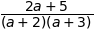

In [ ]:
f2 = 1/(a+2) + 1/(a+3)

sp.together(f2)

### Calculus

##### Limits

Limits are easy to use in SymPy, they follow the syntax limit(function, variable, point), so to compute the limit of f(x) as x -> 0, you would issue limit(f, x, 0):

In [ ]:
sp.limit(sp.sin(x)/x, x, 0)

you can also calculate the limit at infinity:

In [ ]:
sp.limit(x, x, np.Inf)

In [ ]:
sp.limit(1/x, x, np.Inf)

In [ ]:
sp.limit(x**x, x, 0)

##### Differentiation

Diﬀerentiation is usually simple. Use the diff function. The ﬁrst argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative:

In [ ]:
y = sp.Symbol('y')
x = sp.Symbol('x')

sp.diff(y**2, y)

In [ ]:
sp.diff(sp.sin(x), x)

In [ ]:
sp.diff(sp.tan(x), x)

In [ ]:
sp.limit((sp.tan(x+y)-sp.tan(x))/y, y, 0)

For higher order derivatives we can do:


In [ ]:
sp.diff(y**2, y, y)

or

In [5]:
y = sp.Symbol('y')
sp.diff(y**3, y, 3)

To calculate the derivative of a multivariate expression:

In [ ]:
x, y, z = sp.symbols("x,y,z")

In [ ]:
sp.diff(y**2*x, x, 1, y, 2)

In [ ]:
f = sp.sin(x*y) + sp.cos(y*z)

sp.diff(f, x, 1, y, 2)

(Hw1.Task1_c)Ex:
1. Calculate $\lim{x->0, sin(x)/x}$
2. Calulate the derivative of ln(x) for x.

To create an unevaluated derivative, use the Derivative class. It has the same syntax as diff.

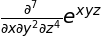

In [ ]:
x,y,z = sp.symbols("x y z")
expr = sp.exp(x*y*z)
deriv = sp.Derivative(expr, x, 1, y, 2, z, 4)
deriv

To evaluate an unevaluated derivative, use the doit method.

In [ ]:
deriv.doit()

##### Series

SymPy also knows how to compute the Taylor series of an expression at a point. Use series(expr, var):

In [ ]:
sp.series(sp.cos(x), x)

In [ ]:
sp.series(1/sp.cos(x), x)

In [ ]:
sp.series(sp.exp(x), x)

##### Integration

SymPy has support for indefinite and definite integration of transcendental elementary and special functions via integrate() facility, which uses powerful extended Risch-Norman algorithm and some heuristics and pattern matching. You can integrate elementary functions:

In [ ]:
sp.integrate(6*x**5, x)

In [ ]:
sp.integrate(2*x + sp.sinh(x), x)

Also special functions are handled easily:

In [ ]:
type(sp.integrate(sp.exp(-x**2)*sp.erf(x), x))

sympy.core.mul.Mul

It is possible to compute definite integral:

In [ ]:
sp.integrate(x**3, (x, -1, 1))

In [ ]:
sp.integrate(sp.sin(x), (x, 0, sp.pi/2))

Also improper integrals are supported as well:

In [ ]:
sp.integrate(sp.exp(-x), (x, 0, np.Inf))

In [ ]:
sp.integrate(sp.exp(-x**2), (x, 0, np.Inf))

Integral() function is also available in SymPy. See in documentation

##### Equation solving 

SymPy is able to solve algebraic equations, in one and several variables:

Given $x^4-1=0$

In [ ]:
sp.solve(x**4 - 1, x)

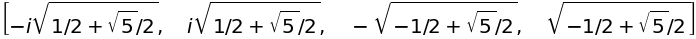

In [ ]:
sp.solve(x**4 + x**2 - 1, x)

As you can see it takes as first argument an expression that is supposed to be equaled to 0. It is able to solve a large part of polynomial equations, and is also capable of solving multiple equations with respect to multiple variables giving a tuple as second argument:

In [ ]:
sp.solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

In [ ]:
sp.solve(x + 5*y - 2, [x,y])

It also has (limited) support for trascendental equations:

In [ ]:
sp.solve(sp.exp(x) + 1, x)

Another alternative in the case of polynomial equations is factor. factor returns the polynomial factorized into irreducible terms, and is capable of computing the factorization over various domains:

In [ ]:
f = x**4 - 3*x**2 + 1
sp.factor(f)

In [ ]:
sp.factor(x**3+x+1)

In [ ]:
sp.factor(f, modulus=5)

(HW1.Task1_d)Ex:
 Solve the system of equations $x + y = 2$, $2\cdot x + y = 0$

### Linear Algebra

##### Matrix

Matrices are created as instances from the Matrix class:

In [ ]:
sp.Matrix([[1,0], [0,1]])

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

unlike a NumPy array, you can also put Symbols in it:

In [ ]:
A = sp.Matrix([[1,x], [y,1]])
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

also you can do any algebraic operations with this

In [ ]:
A**5

⎡                                    2                     ⎛                 2
⎢ 4⋅x⋅y⋅(x⋅y + 1) + 4⋅x⋅y + (x⋅y + 1)    4⋅x⋅(x⋅y + 1) + x⋅⎝4⋅x⋅y + (x⋅y + 1) 
⎢                                                                             
⎢                  ⎛                 2⎞                                      2
⎣4⋅y⋅(x⋅y + 1) + y⋅⎝4⋅x⋅y + (x⋅y + 1) ⎠   4⋅x⋅y⋅(x⋅y + 1) + 4⋅x⋅y + (x⋅y + 1) 

⎞⎤
⎠⎥
 ⎥
 ⎥
 ⎦

##### Differential Equations

SymPy is capable of solving (some) Ordinary Differential Equations. sympy.ode.dsolve works like this:

In [ ]:
sp.Function?

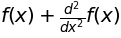

In [ ]:
f = sp.Function('f')
f(x).diff(x, x) + f(x)

In [ ]:
sp.dsolve(f(x).diff(x, x) + f(x), f(x))

In [ ]:
sp.dsolve?

Keyword arguments can be given to this function in order to help if find the best possible resolution system. For example, if you know that it is a separable equations, you can use keyword hint=’separable’ to force dsolve to resolve it as a separable equation.

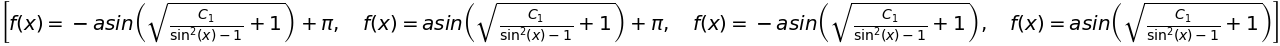

In [ ]:
sp.dsolve(sp.sin(x)*sp.cos(f(x)) + sp.cos(x)*sp.sin(f(x))*f(x).diff(x), f(x), hint='separable')

# References

1. https://docs.sympy.org/latest/tutorial/index.html
2. Symbolic Algebra in Python --- Introduction to Scientiﬁc Computing in Python, Robert Johansson, 2016, Chapter 6
3. https://github.com/sympy/sympy
